In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
data_df = pd.read_csv('../ML Basic/dataset/heart.csv')

In [3]:
data_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data_df.shape

(918, 12)

In [6]:
data_df[data_df.duplicated()].value_counts().any()

False

In [7]:
data_df.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [8]:
dataclean_df = data_df.copy(deep=True)

In [9]:
data_objecttype= dataclean_df.dtypes[dataclean_df.dtypes == 'object'].index

In [10]:
data_objecttype

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [11]:
for i in data_objecttype:
    print(f'{i} : {dataclean_df[i].unique()}')

Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingECG : ['Normal' 'ST' 'LVH']
ExerciseAngina : ['N' 'Y']
ST_Slope : ['Up' 'Flat' 'Down']


In [12]:

dataclean_df['Sex'] = dataclean_df['Sex'].map({'M': 0, 'F': 1})
dataclean_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [13]:
dataclean_df['ExerciseAngina'] = dataclean_df['ExerciseAngina'].apply(lambda x: 0 if x == 'N' else 1)
dataclean_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
encoder = OneHotEncoder(sparse_output=False)

In [16]:
cate_col = ['RestingECG', 'ChestPainType', 'ST_Slope']

In [17]:
encoded_col = encoder.fit_transform(dataclean_df[cate_col])

In [18]:
one_hot_df = pd.DataFrame(encoded_col, columns=encoder.get_feature_names_out(cate_col))
one_hot_df 

,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
914,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
915,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
916,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [19]:
dataclean_df = pd.concat([dataclean_df, one_hot_df], axis=1)

In [20]:
dataclean_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,ATA,140,289,0,Normal,172,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,0,ATA,130,283,0,ST,98,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,54,0,NAP,150,195,0,Normal,122,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,0,1.2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
914,68,0,ASY,144,193,1,Normal,141,0,3.4,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
915,57,0,ASY,130,131,0,Normal,115,1,1.2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
916,57,1,ATA,130,236,0,LVH,174,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
dataclean_df.drop(cate_col, axis=1, inplace=True)

In [22]:
X = dataclean_df.drop(['HeartDisease'], axis=1)
y = dataclean_df['HeartDisease']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 18), (184, 18), (734,), (184,))

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [25]:
model_xgboost = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01)

In [26]:
X_train.dtypes

Age                    int64
Sex                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
ExerciseAngina         int64
Oldpeak              float64
RestingECG_LVH       float64
RestingECG_Normal    float64
RestingECG_ST        float64
ChestPainType_ASY    float64
ChestPainType_ATA    float64
ChestPainType_NAP    float64
ChestPainType_TA     float64
ST_Slope_Down        float64
ST_Slope_Flat        float64
ST_Slope_Up          float64
dtype: object

In [27]:
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
model_xgboost.score(X_test, y_test)

0.8369565217391305

# check importance feature

In [29]:
importance_f = model_xgboost.feature_importances_

In [30]:
importance_f

array([0.02016747, 0.02406419, 0.01812613, 0.04400832, 0.02606785,
       0.0433122 , 0.03284319, 0.04088488, 0.03736195, 0.        ,
       0.        , 0.07334281, 0.        , 0.0163721 , 0.        ,
       0.        , 0.        , 0.62344897], dtype=float32)

In [31]:
imp_feat =pd.Series(importance_f, index=X.columns)

In [32]:
imp_feat

Age                  0.020167
Sex                  0.024064
RestingBP            0.018126
Cholesterol          0.044008
FastingBS            0.026068
MaxHR                0.043312
ExerciseAngina       0.032843
Oldpeak              0.040885
RestingECG_LVH       0.037362
RestingECG_Normal    0.000000
RestingECG_ST        0.000000
ChestPainType_ASY    0.073343
ChestPainType_ATA    0.000000
ChestPainType_NAP    0.016372
ChestPainType_TA     0.000000
ST_Slope_Down        0.000000
ST_Slope_Flat        0.000000
ST_Slope_Up          0.623449
dtype: float32

<Axes: >

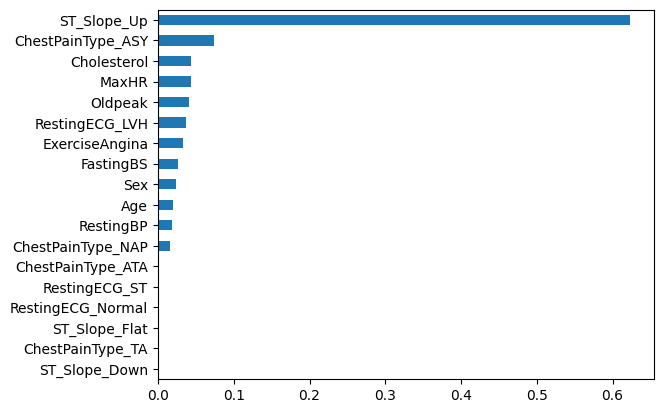

In [33]:
imp_feat.sort_values().plot(kind='barh')

In [34]:
for i, v in zip(X.columns, importance_f):
    print('Feature: {}, Score: {:.5f}'.format(i, v))

Feature: Age, Score: 0.02017
Feature: Sex, Score: 0.02406
Feature: RestingBP, Score: 0.01813
Feature: Cholesterol, Score: 0.04401
Feature: FastingBS, Score: 0.02607
Feature: MaxHR, Score: 0.04331
Feature: ExerciseAngina, Score: 0.03284
Feature: Oldpeak, Score: 0.04088
Feature: RestingECG_LVH, Score: 0.03736
Feature: RestingECG_Normal, Score: 0.00000
Feature: RestingECG_ST, Score: 0.00000
Feature: ChestPainType_ASY, Score: 0.07334
Feature: ChestPainType_ATA, Score: 0.00000
Feature: ChestPainType_NAP, Score: 0.01637
Feature: ChestPainType_TA, Score: 0.00000
Feature: ST_Slope_Down, Score: 0.00000
Feature: ST_Slope_Flat, Score: 0.00000
Feature: ST_Slope_Up, Score: 0.62345


In [35]:
pipeline = Pipeline([
    ('algo', XGBClassifier(n_jobs=1))
])

In [36]:
pipeline.get_params()

{'memory': None,
 'steps': [('algo',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 multi_strategy=None, n_estimators=None, n_jobs=1,
                 num_parallel_tree=None, random_state=None, ...))],
 'verbose': False,
 'algo': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsam

In [38]:
params = {
    'algo__n_estimators' : [100, 110, 120, 130, 140, 200], 
    'algo__max_depth' : [i for i in range(1, 10)],
    'algo__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1]
}

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
model_randomsearch = RandomizedSearchCV(pipeline, params, cv=5,  n_jobs=-1, verbose=1, )

In [41]:
model_randomsearch.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('algo',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importance_type=None,
                                                            interaction_constr...
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=1,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'algo__learning_rate': [0.0001, 0.001,
                                                                0.01, 0.1, 1],
                                        'algo__max_depth': [1, 2, 3, 4, 5, 6, 7,
                                                            8, 9],
                                        'algo__n_estimators': [100, 110, 120,
                                                               130, 140, 200]},
                   verbose=1)

In [42]:
print(model_randomsearch.best_params_)
print(model_randomsearch.score(X_test, y_test))

{'algo__n_estimators': 110, 'algo__max_depth': 4, 'algo__learning_rate': 1}
0.8478260869565217


In [43]:
pd.DataFrame(model_randomsearch.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_estimators,param_algo__max_depth,param_algo__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.291368,0.072482,0.045340,0.011966,110,4,1,"{'algo__n_estimators': 110, 'algo__max_depth':...",0.863946,0.850340,0.850340,0.816327,0.821918,0.840574,0.018292,1
2,0.350778,0.023459,0.038836,0.009825,120,6,0.1,"{'algo__n_estimators': 120, 'algo__max_depth':...",0.863946,0.823129,0.863946,0.816327,0.828767,0.839223,0.020567,2
8,0.534205,0.109651,0.045803,0.036202,140,9,0.1,"{'algo__n_estimators': 140, 'algo__max_depth':...",0.850340,0.829932,0.870748,0.823129,0.821918,0.839213,0.018774,3
3,0.258555,0.018492,0.033369,0.008169,120,3,1,"{'algo__n_estimators': 120, 'algo__max_depth':...",0.857143,0.802721,0.870748,0.816327,0.828767,0.835141,0.025289,4
1,0.318159,0.038503,0.029928,0.015810,130,7,1,"{'algo__n_estimators': 130, 'algo__max_depth':...",0.843537,0.843537,0.863946,0.809524,0.815068,0.835123,0.020149,5
7,0.580801,0.043101,0.035166,0.010187,110,9,0.01,"{'algo__n_estimators': 110, 'algo__max_depth':...",0.843537,0.843537,0.863946,0.809524,0.808219,0.833753,0.021643,6
0,0.823242,0.216363,0.029779,0.011645,200,3,0.0001,"{'algo__n_estimators': 200, 'algo__max_depth':...",0.557823,0.551020,0.551020,0.551020,0.554795,0.553136,0.002762,7
4,0.409485,0.111855,0.051121,0.024098,120,1,0.001,"{'algo__n_estimators': 120, 'algo__max_depth':...",0.557823,0.551020,0.551020,0.551020,0.554795,0.553136,0.002762,7
5,0.850710,0.053743,0.031806,0.013569,200,6,0.0001,"{'algo__n_estimators': 200, 'algo__max_depth':...",0.557823,0.551020,0.551020,0.551020,0.554795,0.553136,0.002762,7
6,0.237202,0.027949,0.041872,0.013145,100,1,0.0001,"{'algo__n_estimators': 100, 'algo__max_depth':...",0.557823,0.551020,0.551020,0.551020,0.554795,0.553136,0.002762,7
